In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pickle
from imblearn.over_sampling import SMOTE


In [2]:
# Chargement des données
file_path = "DatasetmalwareExtrait.csv"
data = pd.read_csv(file_path)




In [3]:
# Vérifier les colonnes nécessaires
required_columns = ['AddressOfEntryPoint', 'ResourceSize', 'SizeOfStackReserve', 'legitimate']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Colonnes manquantes : {missing_columns}")
    exit(1)


In [4]:
# Aperçu et Exploration des données
print("Aperçu des données :")
display(data.head())
print(f"Nombre d'exemples : {data.shape[0]}, Nombre de colonnes : {data.shape[1]}")
print("Description statistique :")
display(data.describe())


Aperçu des données :


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


Nombre d'exemples : 137444, Nombre de colonnes : 9
Description statistique :


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


C:\Users\bmd tech\AppData\Local\Temp\ipykernel_2376\1044927447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='legitimate', data=data, palette='Set2')


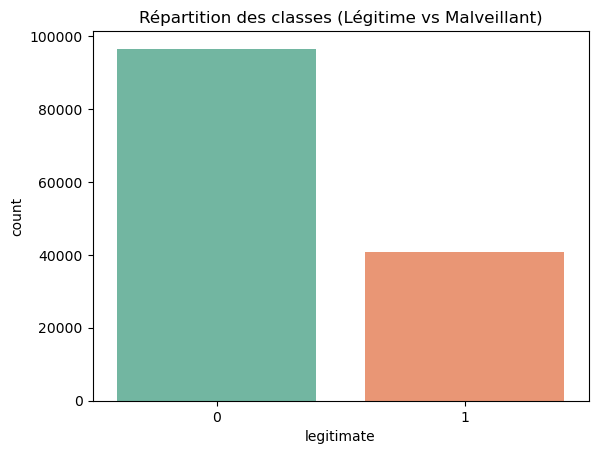

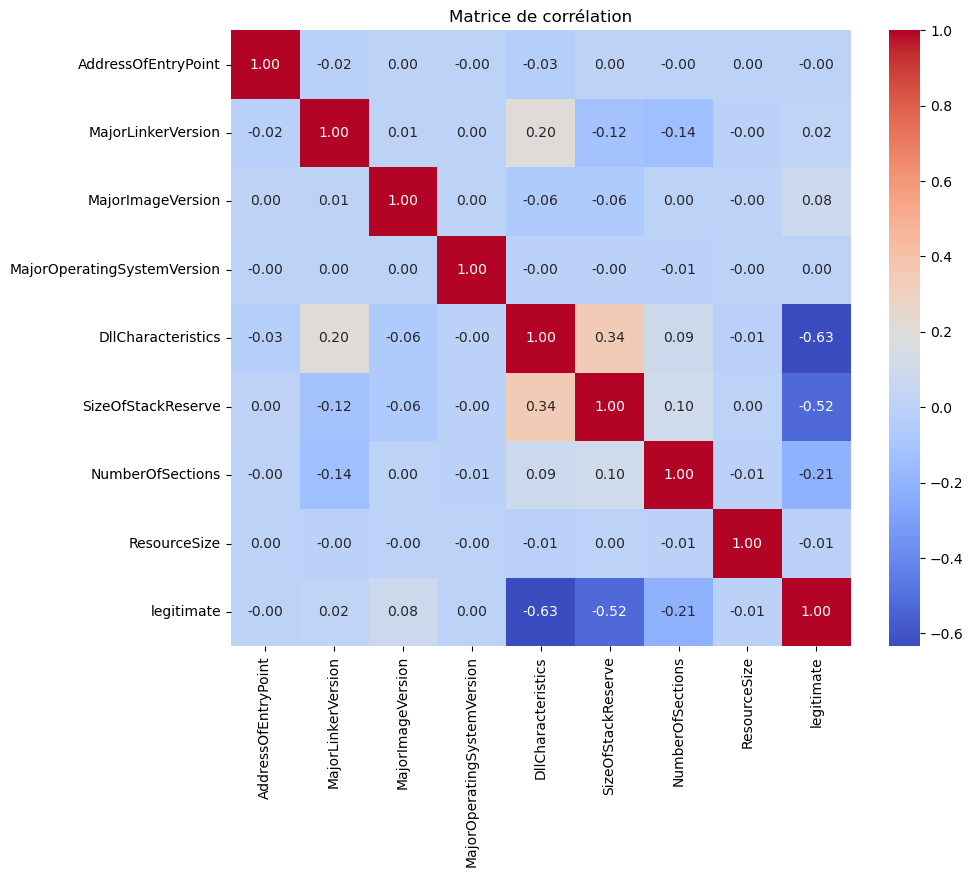

In [5]:
# Distribution de la cible
sns.countplot(x='legitimate', data=data, palette='Set2')
plt.title("Répartition des classes (Légitime vs Malveillant)")
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [6]:
# Normalisation des colonnes
columns_to_normalize = ['AddressOfEntryPoint', 'ResourceSize', 'SizeOfStackReserve']
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Séparation en X et y
X = data.drop('legitimate', axis=1)
y = data['legitimate']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [7]:
# # Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [8]:
# Évaluation du modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test : {accuracy:.2f}")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))




Précision sur le jeu de test : 0.99
Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19186
           1       0.98      0.99      0.99      8303

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



C:\Users\bmd tech\AppData\Local\Temp\ipykernel_2376\679997938.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


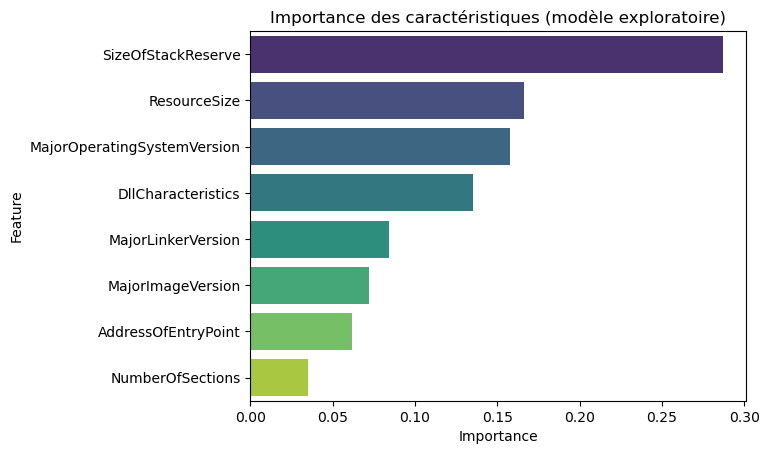

Exploration terminée. Le modèle final sera entraîné dans 'train_model.py'.


In [10]:
# Visualisation de l'importance des caractéristiques
# 
# lt.show()

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Importance des caractéristiques (modèle exploratoire)")
plt.show()

print("Exploration terminée. Le modèle final sera entraîné dans 'train_model.py'.")

In [11]:

# Sauvegarde du modèle
model_path = "model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(model, file)
print(f"Modèle sauvegardé à : {model_path}")

Modèle sauvegardé à : model.pkl


In [12]:
# ✅ 13. Correction avec SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



C:\Users\bmd tech\AppData\Local\Temp\ipykernel_2376\3145342833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='Set2')


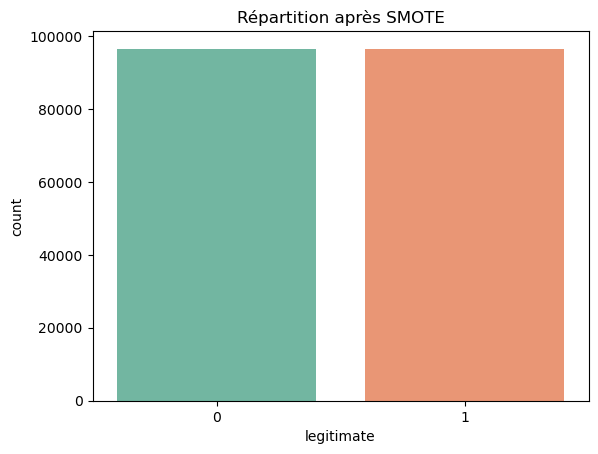

In [13]:
# Répartition après SMOTE
sns.countplot(x=y_resampled, palette='Set2')
plt.title("Répartition après SMOTE")
plt.show()



In [14]:
# ✅ 14. Entraînement après SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision après SMOTE : {accuracy:.2f}")
print("Rapport de classification après SMOTE :")
print(classification_report(y_test, y_pred))



Précision après SMOTE : 0.99
Rapport de classification après SMOTE :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19375
           1       0.99      0.99      0.99     19236

    accuracy                           0.99     38611
   macro avg       0.99      0.99      0.99     38611
weighted avg       0.99      0.99      0.99     38611



In [15]:
# ✅ 15. Sauvegarde du modèle après SMOTE
model_path_smote = "model_smote.pkl"
with open(model_path_smote, 'wb') as file:
    pickle.dump(model, file)
print(f"Modèle après SMOTE sauvegardé à : {model_path_smote}")


Modèle après SMOTE sauvegardé à : model_smote.pkl


In [18]:
# ✅ 16. Conclusion
print("Exploration, entraînement et amélioration du modèle terminés.")

Exploration, entraînement et amélioration du modèle terminés.
